SVM Classification Accuracy: 1.0000


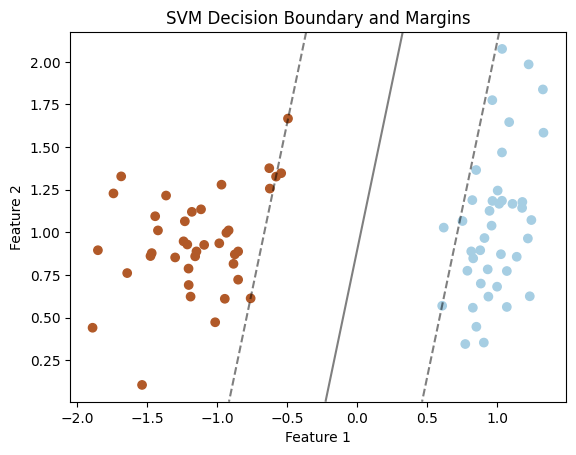

In [5]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, learning_rate=0.001, regularization_strength=0.01, max_iterations=1000):
        """
        Initializes a Support Vector Machine classifier.

        Parameters:
        - learning_rate: Step size for gradient descent optimization
        - regularization_strength: Controls the trade-off between margin width and misclassification
        - max_iterations: Maximum number of training iterations
        """
        self.learning_rate = learning_rate
        self.regularization_strength = regularization_strength
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None

    def fit(self, feature_matrix, target_labels):
        """
        Trains the SVM model using gradient descent optimization.

        Parameters:
        - feature_matrix: Input features (num_samples × num_features)
        - target_labels: Class labels (num_samples,), converted to {-1, 1}
        """
        num_samples, num_features = feature_matrix.shape

        # Ensure labels are in {-1, 1} format
        transformed_labels = np.where(target_labels <= 0, -1, 1)

        # Initialize model parameters
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Perform gradient descent optimization
        for _ in range(self.max_iterations):
            for sample_idx, sample_features in enumerate(feature_matrix):
                margin = transformed_labels[sample_idx] * (np.dot(sample_features, self.weights) - self.bias)

                if margin >= 1:
                    # Correct classification with sufficient margin
                    self.weights -= self.learning_rate * (2 * self.regularization_strength * self.weights)
                else:
                    # Update for misclassified or margin violation
                    self.weights -= self.learning_rate * (
                        2 * self.regularization_strength * self.weights -
                        np.dot(sample_features, transformed_labels[sample_idx]))
                    self.bias -= self.learning_rate * transformed_labels[sample_idx]

    def predict(self, feature_matrix):
        """
        Predicts class labels for input samples.

        Parameters:
        - feature_matrix: Input features (num_samples × num_features)

        Returns:
        - predictions: Array of predicted class labels (-1 or 1)
        """
        decision_values = np.dot(feature_matrix, self.weights) - self.bias
        return np.sign(decision_values)

    def decision_function(self, feature_matrix):
        """
        Computes the signed distance from samples to the decision boundary.
        Maintained original name for compatibility with plotting function.

        Parameters:
        - feature_matrix: Input features (num_samples × num_features)

        Returns:
        - distances: Array of decision values
        """
        return np.dot(feature_matrix, self.weights) - self.bias

def plot_decision_boundary(svm_model, feature_matrix, target_labels):
    """
    Plots the dataset and SVM decision boundary with margins.

    Parameters:
    - svm_model: Trained SVM classifier
    - feature_matrix: Input features for visualization
    - target_labels: True class labels for coloring points
    """
    plt.scatter(feature_matrix[:, 0], feature_matrix[:, 1], c=target_labels, cmap=plt.cm.Paired)

    # Create evaluation grid
    current_axes = plt.gca()
    x_limits = current_axes.get_xlim()
    y_limits = current_axes.get_ylim()

    # Generate grid points
    x_coords = np.linspace(x_limits[0], x_limits[1], 30)
    y_coords = np.linspace(y_limits[0], y_limits[1], 30)
    y_grid, x_grid = np.meshgrid(y_coords, x_coords)
    grid_points = np.vstack([x_grid.ravel(), y_grid.ravel()]).T

    # Compute decision values for grid points
    decision_values = svm_model.decision_function(grid_points).reshape(x_grid.shape)

    # Plot decision boundary and margins
    current_axes.contour(
        x_grid, y_grid, decision_values,
        colors='k', levels=[-1, 0, 1],
        alpha=0.5, linestyles=['--', '-', '--']
    )

    plt.title("SVM Decision Boundary and Margins")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

if __name__ == "__main__":
    # Generate synthetic classification dataset
    features, labels = make_classification(
        n_samples=100,
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=1,
        n_clusters_per_class=1
    )

    # Convert labels to SVM format (-1, 1)
    labels = np.where(labels == 0, -1, 1)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=0.2, random_state=42
    )

    # Initialize and train SVM classifier
    svm_classifier = SVM(
        learning_rate=0.001,
        regularization_strength=0.01,
        max_iterations=1000
    )
    svm_classifier.fit(X_train, y_train)

    # Evaluate model performance
    predictions = svm_classifier.predict(X_test)
    classification_accuracy = np.mean(predictions == y_test)
    print(f"SVM Classification Accuracy: {classification_accuracy:.4f}")

    # Visualize the decision boundary
    plot_decision_boundary(svm_classifier, X_train, y_train)